In [63]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [64]:
coca_cola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coca_cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [65]:
coca_cola.shape

(42, 2)

<AxesSubplot:>

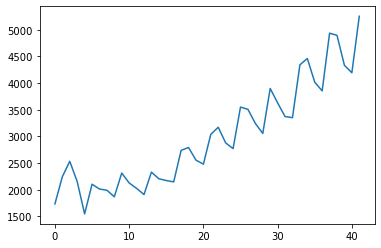

In [66]:
coca_cola['Sales'].plot()

In [67]:
coca_cola.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [68]:
# converting into datetime format as the index was not in correct format.
coca_cola['Quarter_Year'] = coca_cola['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Extract date from the quarters
coca_cola['Date'] = (pd.to_datetime(coca_cola['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))

In [69]:
coca_cola.head()

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [70]:
#Extracting quarters from and creatin seperate column
coca_cola['Quarters'] = 0

for i in range(42):
    n = coca_cola['Quarter'][i]
    coca_cola['Quarters'][i] = n[0:2]
    
coca_cola.head(5)

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_4784\4206526231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_cola['Quarters'][i] = n[0:2]


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [71]:
#Create dummy variable for quarters
dummy = pd.DataFrame(pd.get_dummies(coca_cola['Quarters']))
coca_cola_1= pd.concat((coca_cola, dummy), axis=1)

coca_cola_1.head()


,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [72]:
#drop the unnecessary columns
coca_cola_1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
coca_cola_1.head()


,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [73]:
cola = coca_cola_1.copy()

In [74]:
coca_cola_1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


# Visualisation

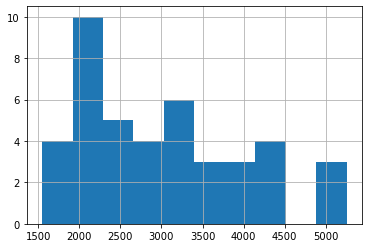

In [75]:
# Histogram
coca_cola_1.Sales.hist()
plt.show()
# we can clearly observe data distribution is non - stationary

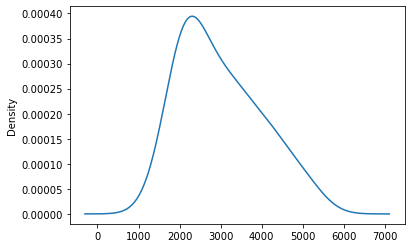

In [76]:
# Distplot
coca_cola_1['Sales'].plot(kind='kde')
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

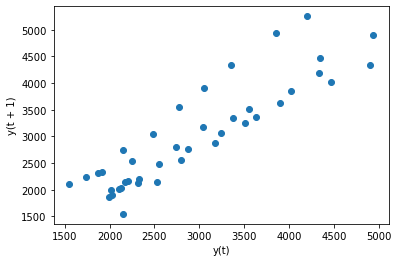

In [77]:
# Lagplot
from pandas.plotting import lag_plot
lag_plot(coca_cola_1['Sales'])

In [78]:
#Get month and year columns in our data
cola["Date"] = pd.to_datetime(cola['Date'],format="%b-%y")
cola["month"] = cola['Date'].dt.strftime("%b") # month extraction
cola["year"] = cola['Date'].dt.strftime("%Y") # year extraction
cola.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987


<AxesSubplot:xlabel='Quarters', ylabel='year'>

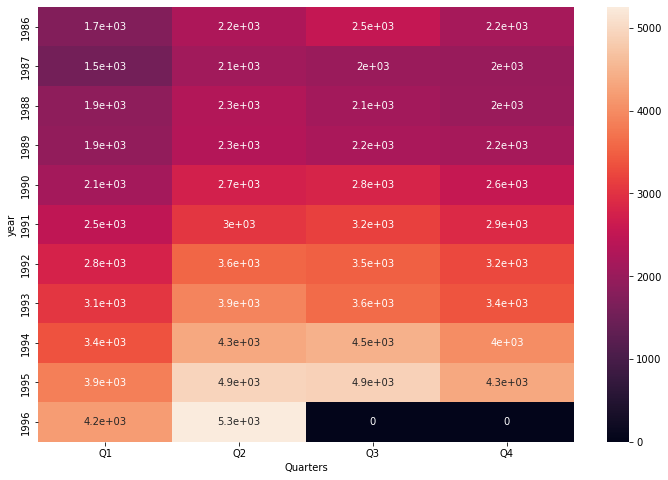

In [79]:
# heatmap of pivot_table
plt.figure(figsize=(12,8))
pivot_table= pd.pivot_table(data=cola,values="Sales",index="year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(pivot_table,annot=True) 

In [80]:
 # Q2 has higher sales during the given time periods

<AxesSubplot:xlabel='year', ylabel='Sales'>

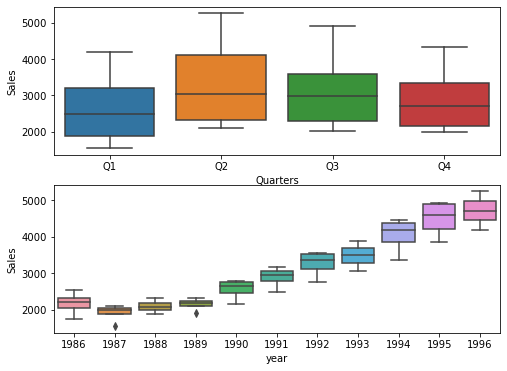

In [81]:
# Boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=cola)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=cola)

<AxesSubplot:xlabel='year', ylabel='Sales'>

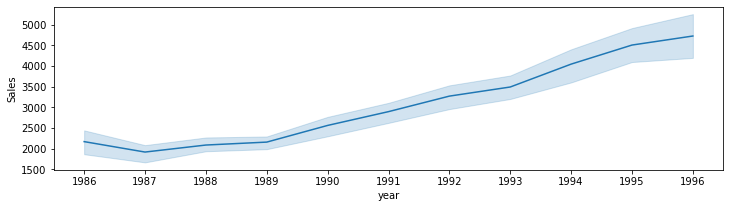

In [82]:
# Line plot
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=cola)


In [83]:
r=np.arange(1,43)

In [84]:
# time steps
t=pd.Series(data=r)
t

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
dtype: int32

In [85]:
# timestep square values
t_sqr=pd.Series(data=(r*r))
t_sqr

0        1
1        4
2        9
3       16
4       25
5       36
6       49
7       64
8       81
9      100
10     121
11     144
12     169
13     196
14     225
15     256
16     289
17     324
18     361
19     400
20     441
21     484
22     529
23     576
24     625
25     676
26     729
27     784
28     841
29     900
30     961
31    1024
32    1089
33    1156
34    1225
35    1296
36    1369
37    1444
38    1521
39    1600
40    1681
41    1764
dtype: int32

In [86]:
# apply log function on sales
cola['log_sales']=np.log(cola['Sales'])

In [87]:
cola['t']=t
cola['t_sqr']=t_sqr
cola.head() 

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,log_sales,t,t_sqr
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986,7.458663,1,1
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986,7.716443,2,4
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986,7.837477,3,9
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986,7.675529,4,16
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987,7.344602,5,25


# Moving Average

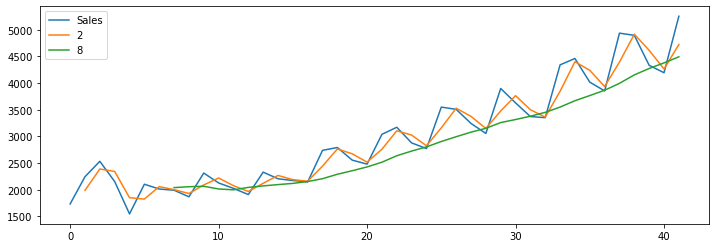

In [88]:
#Smoothening of the graph
plt.figure(figsize=(12,4))
cola['Sales'].plot()
for i in range(2,12,6):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time Series Decompostionplot

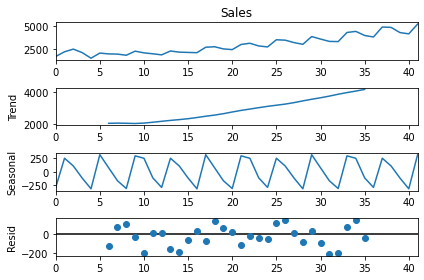

In [89]:
#from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts = seasonal_decompose(cola['Sales'],period=12)
decompose_ts.plot()
plt.show() 

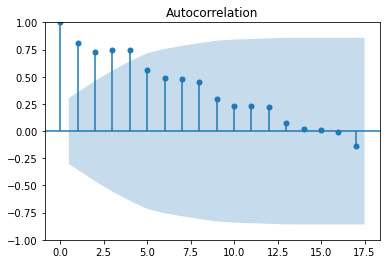

In [90]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(cola["Sales"]) 

C:\Users\Rohith Challam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


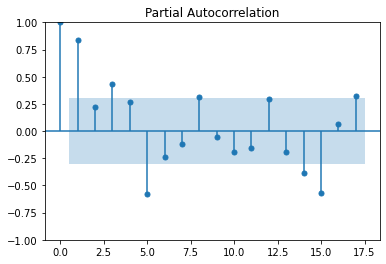

In [91]:
# PACF plot
pacf = plot_pacf(cola["Sales"])  

# Fortecasting on model based methods

In [92]:
# Spliting dataset into Train and Test
Train=cola.head(34)
Test=cola.tail(8)

# Model Building

In [93]:
# giving def for ERROR
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [94]:
#Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()                                                              #Fit the train model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                              #predict on test data   
mae_linear = MAE(Test['Sales'],pred_linear)                                                                     
mae_linear

0.15073862296663187

In [95]:
#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
mae_Exp = MAE(Test['Sales'], np.exp(pred_Exp))
mae_Exp

0.1106099745588034

In [96]:
#Quadratic 
Quad = smf.ols('Sales~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
mae_Quad = MAE(Test['Sales'],pred_Quad)
mae_Quad

0.0849506929630091

In [97]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
mae_add_sea = MAE(Test['Sales'],pred_add_sea)
mae_add_sea

0.7001968083753536

In [98]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_sqr+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_sqr']]))
mae_add_sea_quad = MAE(Test['Sales'], pred_add_sea_quad)
mae_add_sea_quad

0.048140027199533

In [99]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
mae_Mult_sea = MAE(Test['Sales'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7466753446743146

In [100]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
mae_Mult_add_sea = MAE(Test['Sales'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.09539363556773724

# Forecasting on Data based methods

In [101]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_ses = MAE(pred_ses,Test.Sales) 
MAE_ses

0.2062971720565921

In [102]:
# Holt method with Additive trend
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test.Sales) 
MAE_hw

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_4784\967683702.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.10874453738176518

In [103]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,Test.Sales) 
MAE__hwe_add_add

0.05889898662011157

In [104]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test.Sales)
MAE__hwe_mul_add

0.08077769088698535

# Apply Arima Model

In [105]:
from pmdarima import auto_arima 
arima=auto_arima(cola['Sales'],start_p=1,start_q=1,max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=407.084, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=406.443, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=406.440, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=404.444, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=404.445, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=405.084, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=403.610, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.372 seconds


In [106]:
arima.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -200.223
Date:                            Sun, 13 Nov 2022   AIC                            402.446
Time:                                    17:11:06   BIC                            403.813
Sample:                                         0   HQIC                           402.874
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.813e+04   1.67e+04      3.472      0.001    2.53e+04    9.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.88   Prob(JB):                         0.76
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
# Split data into train / test sets
train = cola.iloc[:len(cola)-12]
test = cola.iloc[len(cola)-12:] # set one year(12 months) for testing

In [108]:
# Fit a SARIMAX(0, 1, 0)x(0, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Sales'], 
                order = (0, 1, 0), 
                seasonal_order =(0, 1, 0, 12))


In [109]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -118.553
Date:                            Sun, 13 Nov 2022   AIC                            239.106
Time:                                    17:11:06   BIC                            239.940
Sample:                                         0   HQIC                           239.189
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.663e+04   2.56e+04      2.603      0.009    1.65e+04    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.94   Prob(JB):                         0.85
Heteroskedasticity (H):               0.42   Skew:                             0.15
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
# Predictions of ARIMA Model against the test set

<AxesSubplot:>

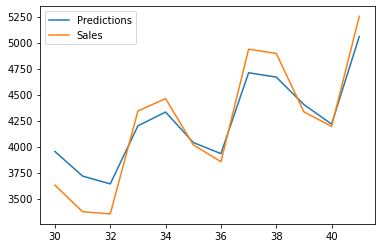

In [111]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [112]:
# Evaluate the model using  RMSE
from statsmodels.tools.eval_measures import rmse

In [113]:
# Calculate root mean squared error
arima_rmse=rmse(test["Sales"], predictions)
arima_rmse

203.11383458647393

In [114]:
# Calculate mean squared error
rmse_mse=rmse(test["Sales"], predictions)
rmse_mse

203.11383458647393

In [115]:
AR_MAE=MAE(test["Sales"], predictions)
AR_MAE

0.04155338483518798

In [116]:
# Creating DataFrame for all MAE values
data = {"MODEL":pd.Series(["MAE_linear","MAE_Exp","MAE_Quad","MAE_add_sea","MAE_add_sea_quad","MAE_Mult_sea","MAE_Mult_add_sea","MAE_ses","MAE_hw","MAE_hwe_add_add","MAE_hwe_mul_add","AR_MAE"]),"MAE_Values":pd.Series([mae_linear,mae_Exp,mae_Quad,mae_add_sea,mae_add_sea_quad,mae_Mult_sea,mae_Mult_add_sea,MAE_ses,MAE_hw,MAE__hwe_add_add,MAE__hwe_mul_add,])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
4,MAE_add_sea_quad,0.048140
9,MAE_hwe_add_add,0.058899
10,MAE_hwe_mul_add,0.080778
2,MAE_Quad,0.084951
6,MAE_Mult_add_sea,0.095394
8,MAE_hw,0.108745
1,MAE_Exp,0.110610
0,MAE_linear,0.150739
7,MAE_ses,0.206297
3,MAE_add_sea,0.700197


In [117]:
# Holts winter exponential smoothing with additive seasonality and additive trend also ARIMA model give us best mean absolute Error

# Using ARIMA model forecast on next 3 years

In [118]:
# Train the model on the full dataset
model = SARIMAX(cola['Sales'], 
                        order = (0, 1, 0), 
                        seasonal_order =(0, 1, 0, 12))

In [119]:
model=model.fit()

In [120]:
forecast=model.predict(start=len(cola),end = (len(cola)-1) + 3 * 12,typ = 'levels').rename('Forecast') 

In [121]:
pred=pd.DataFrame(forecast)
pred

,Forecast
42,4983.0
43,4727.0
44,4706.0
45,5696.0
46,5815.0
47,5371.0
48,5208.0
49,6290.0
50,6249.0
51,5687.0


<AxesSubplot:>

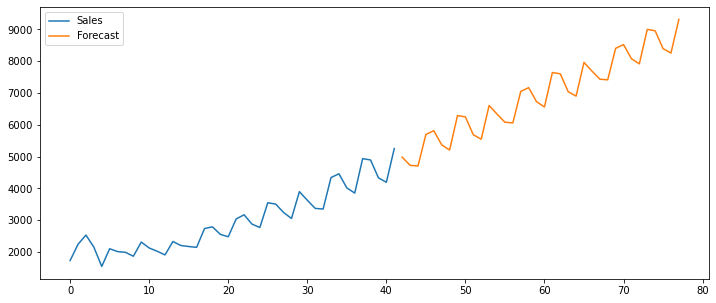

In [122]:
# Plot the forecast values
cola['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)